In [9]:
import collections

Card = collections.namedtuple('Card',['rank','suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2,11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
    def __init__(self):
        self._cards = [Card(rank,suit) for suit in self.suits
                      for rank in self.ranks]
        
deck = FrenchDeck()
len(deck)
print[deck[0]]

TypeError: 'FrenchDeck' object does not support indexing

# 以上是French类的定义
### 可以发现，French不支持len以及索引方法，这是因为他并不知道你以什么属性作为len或者[]的标准
### 所以，我们加上以下的方法

In [15]:
import collections

Card = collections.namedtuple('Card',['rank','suit'])

class FrenchDeck:
    ranks = [str(n) for n in range(2,11)] + list('JQKA')
    suits = 'spades diamonds clubs hearts'.split()
    def __init__(self):
        self._cards = [Card(rank,suit) for suit in self.suits
                      for rank in self.ranks]
    
    #新加入的方法
    def __len__(self):
        return len(self._cards)
    
    def __getitem__(self,position):
        return self._cards[position]
        
deck = FrenchDeck()
len(deck)
print(deck[3])

Card(rank='5', suit='spades')


### 可以发现，当添加了__len__和__getitem__后，支持了len以及索引
### 由此可以引申出一个知识点，len以及[]都是通过调用特殊方法实现，也就是__len__以及__getitem__
### 当定义了__getitem__后，会支持切片操作，这个类也会变成可迭代对象

In [19]:
for item in deck:
    print('%s,%s' % (item.rank,item.suit),end=' ')

2,spades 3,spades 4,spades 5,spades 6,spades 7,spades 8,spades 9,spades 10,spades J,spades Q,spades K,spades A,spades 2,diamonds 3,diamonds 4,diamonds 5,diamonds 6,diamonds 7,diamonds 8,diamonds 9,diamonds 10,diamonds J,diamonds Q,diamonds K,diamonds A,diamonds 2,clubs 3,clubs 4,clubs 5,clubs 6,clubs 7,clubs 8,clubs 9,clubs 10,clubs J,clubs Q,clubs K,clubs A,clubs 2,hearts 3,hearts 4,hearts 5,hearts 6,hearts 7,hearts 8,hearts 9,hearts 10,hearts J,hearts Q,hearts K,hearts A,hearts 

In [21]:
print(deck[3:5])

[Card(rank='5', suit='spades'), Card(rank='6', suit='spades')]


# 特殊方法小结
* 特殊方法是为了被编译器调用的，自己并不需要调用它，也就是说没有my_obj.\__len__()这种方法，而是应该调用len(my_object)
* 如果是python内置的类型，比如list,str,bytearray等，那么CPython会直接抄个近路，\__len__实际上会直接返回ob_size属性，这比调用方法快很多
* 很多时候，特殊方法的调用是隐式的，比如 for i in x: 背后用的是iter(x),这个函数调用的是x.\__iter__() 方法
* 除非有大量的元编程，否则应该是通过内置的len，iter等方法来调用特殊方法，而不是直接调用特殊方法，len，iter等内置函数不仅会调用特殊方法，还会提供一定的好处
* 不要随意添加特殊方法，比如\__foo__，虽然目前这个名字还没被用到，但以后就不一定了

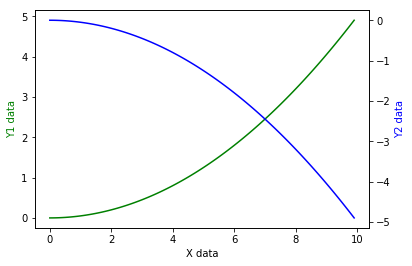

In [24]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,10,0.1)
y1 = 0.05 * x ** 2
y2 = -1 * y1
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')   # green, solid line

ax1.set_xlabel('X data')

ax1.set_ylabel('Y1 data', color='g')

ax2.plot(x, y2, 'b-') # blue

ax2.set_ylabel('Y2 data', color='b')
plt.show()

### 动画

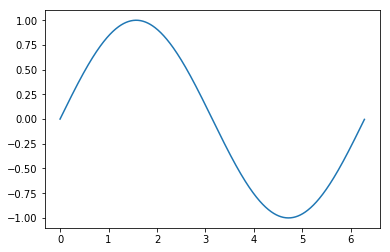

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

fig,ax = plt.subplots()

x = np.arange(0,2*np.pi,0.01)
line, = ax.plot(x,np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x+i/100))
    return line,

def init():
    line.set_ydata(np.sin(x))
    return line,
ani = animation.FuncAnimation(fig=fig,func=animate,frames=100,init_func=init,interval=20,blit=True)
plt.show()